Importing:

In [46]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [47]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [48]:
%run "../DL_notebooks/src/dataloading.ipynb"
%run "../DL_notebooks/src/training.ipynb"
%run "../DL_notebooks/src/evaluate.ipynb"
%run "../DL_notebooks/src/visualizations.ipynb"
%run "../DL_notebooks/model_architectures.ipynb"



Data loaded and split into training, validation and testing datasets


Training:

In [49]:
def update_current_model(json_file, new_model_name):
    # Load the JSON data from the file
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Update the current-model value
    data['current-model'] = new_model_name

    # Save the updated JSON data back to the file
    with open(json_file, 'w') as file:
        json.dump(data, file, indent=4)
json_file_path = '../DL_notebooks/configs/model_configs.json'
new_model_name = 'CNN'
update_current_model(json_file_path, new_model_name)

In [50]:
model_config_file = open('../DL_notebooks/configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'CNN':
        model = MRI_CNN
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

In [51]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )

Training:  10%|█         | 1/10 [00:33<05:00, 33.35s/epoch]

Epoch [1/10] Train Loss: 1.3141 Train Accuracy: 40.12% Validation Loss: 1.2707 Validation Accuracy: 43.62%


Training:  20%|██        | 2/10 [01:05<04:22, 32.81s/epoch]

Epoch [2/10] Train Loss: 0.9729 Train Accuracy: 60.42% Validation Loss: 0.9441 Validation Accuracy: 60.10%


Training:  30%|███       | 3/10 [01:37<03:47, 32.51s/epoch]

Epoch [3/10] Train Loss: 0.8193 Train Accuracy: 65.86% Validation Loss: 0.8526 Validation Accuracy: 64.62%


Training:  40%|████      | 4/10 [02:09<03:13, 32.23s/epoch]

Epoch [4/10] Train Loss: 0.6533 Train Accuracy: 73.51% Validation Loss: 0.8129 Validation Accuracy: 64.78%


Training:  50%|█████     | 5/10 [02:42<02:41, 32.31s/epoch]

Epoch [5/10] Train Loss: 0.4879 Train Accuracy: 81.15% Validation Loss: 0.8130 Validation Accuracy: 73.51%


Training:  60%|██████    | 6/10 [03:14<02:09, 32.27s/epoch]

Epoch [6/10] Train Loss: 0.3835 Train Accuracy: 85.25% Validation Loss: 0.8020 Validation Accuracy: 74.96%


Training:  70%|███████   | 7/10 [03:46<01:36, 32.17s/epoch]

Epoch [7/10] Train Loss: 0.2670 Train Accuracy: 89.88% Validation Loss: 0.7927 Validation Accuracy: 74.64%


Training:  80%|████████  | 8/10 [04:18<01:04, 32.09s/epoch]

Epoch [8/10] Train Loss: 0.1983 Train Accuracy: 93.11% Validation Loss: 0.9037 Validation Accuracy: 73.83%


Training:  90%|█████████ | 9/10 [04:50<00:32, 32.16s/epoch]

Epoch [9/10] Train Loss: 0.1938 Train Accuracy: 92.30% Validation Loss: 0.7923 Validation Accuracy: 76.90%


Training: 100%|██████████| 10/10 [05:22<00:00, 32.21s/epoch]

Epoch [10/10] Train Loss: 0.1113 Train Accuracy: 96.18% Validation Loss: 0.9108 Validation Accuracy: 78.35%


In [52]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  10%|█         | 1/10 [00:01<00:12,  1.43s/epoch]

Testing Epoch [1/10] Test Loss: 0.8812 Test Accuracy: 80.16% Time per Epoch: 1.43 seconds


Testing:  20%|██        | 2/10 [00:02<00:11,  1.41s/epoch]

Testing Epoch [2/10] Test Loss: 0.8987 Test Accuracy: 80.16% Time per Epoch: 1.40 seconds


Testing:  30%|███       | 3/10 [00:04<00:09,  1.40s/epoch]

Testing Epoch [3/10] Test Loss: 0.9140 Test Accuracy: 80.16% Time per Epoch: 1.39 seconds


Testing:  40%|████      | 4/10 [00:05<00:08,  1.41s/epoch]

Testing Epoch [4/10] Test Loss: 0.8950 Test Accuracy: 80.16% Time per Epoch: 1.42 seconds


Testing:  50%|█████     | 5/10 [00:07<00:07,  1.41s/epoch]

Testing Epoch [5/10] Test Loss: 0.8995 Test Accuracy: 80.16% Time per Epoch: 1.40 seconds


Testing:  60%|██████    | 6/10 [00:08<00:05,  1.41s/epoch]

Testing Epoch [6/10] Test Loss: 0.8776 Test Accuracy: 80.16% Time per Epoch: 1.41 seconds


Testing:  70%|███████   | 7/10 [00:09<00:04,  1.41s/epoch]

Testing Epoch [7/10] Test Loss: 0.8759 Test Accuracy: 80.16% Time per Epoch: 1.41 seconds


Testing:  80%|████████  | 8/10 [00:11<00:02,  1.41s/epoch]

Testing Epoch [8/10] Test Loss: 0.8901 Test Accuracy: 80.16% Time per Epoch: 1.42 seconds


Testing:  90%|█████████ | 9/10 [00:12<00:01,  1.41s/epoch]

Testing Epoch [9/10] Test Loss: 0.8836 Test Accuracy: 80.16% Time per Epoch: 1.38 seconds


Testing: 100%|██████████| 10/10 [00:14<00:00,  1.41s/epoch]

Testing Epoch [10/10] Test Loss: 0.8995 Test Accuracy: 80.16% Time per Epoch: 1.40 seconds
Average Test Loss: 0.8915
Average Test Accuracy: 80.16%


Classification:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       546
           1       0.95      0.94      0.95       560
           2       0.92      0.94      0.93       254
           3       0.99      0.99      0.99       497

    accuracy                           0.96      1857
   macro avg       0.96      0.96      0.96      1857
weighted avg       0.96      0.96      0.96      1857

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       169
           1       0.67      0.81      0.73       175
           2       0.82      0.79      0.81        97
           3       0.89      0.86      0.88       178

    accuracy                           0.78       619
   macro avg       0.80      0.78      0.79       619
weighted avg       0.79      0.78      0.78       619

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       186
           1       0.

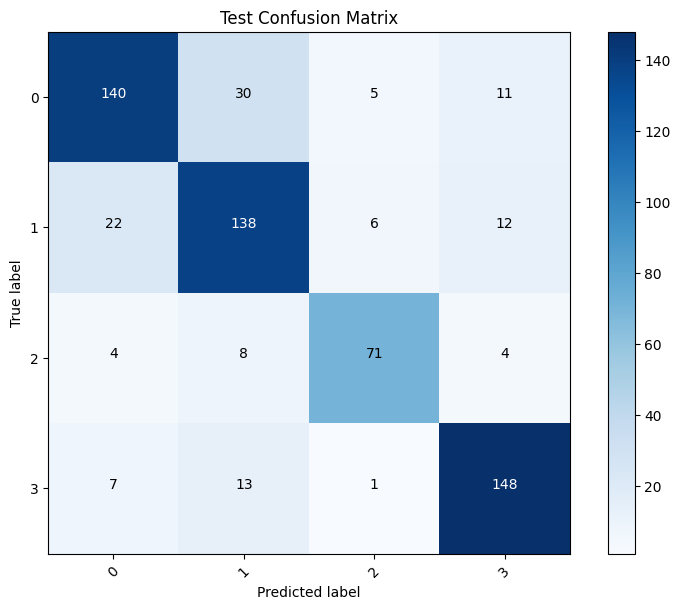

In [53]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

# print(classification_report(train_labels, train_preds))
# print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
# plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
# plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')
plt.show()

AUC Curve:

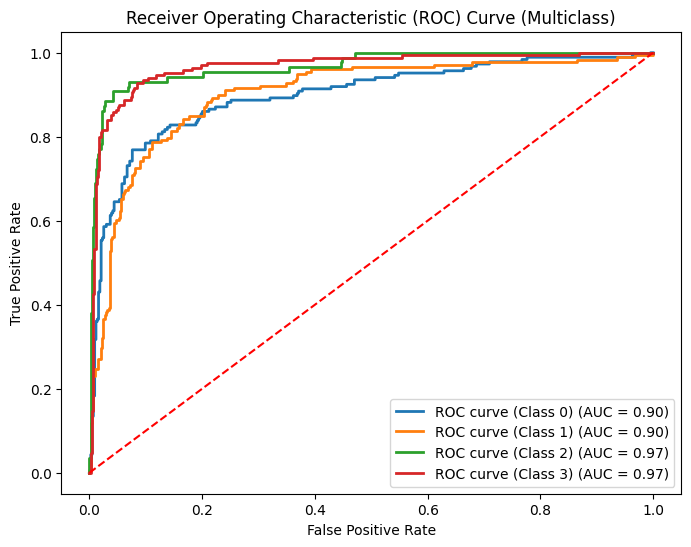

In [54]:
plot_auc_curve_multiclass(model,test_loader,4)